In [57]:
import matplotlib.pyplot as plt
from scipy.special import inv_boxcox
from scipy.stats import boxcox
import pandas as pd
import yfinance as yf

In [58]:
df = pd.DataFrame(yf.download('AAPL', '2006-01-01', '2021-01-01').resample("MS").mean().Close)

[*********************100%***********************]  1 of 1 completed


### ARMA
_Only for stationary time series._

### ARIMA
_For time series with trend but without seasonality._

An initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity of the mean function (i.e., the trend).

### SARIMA
_For time series with trend and seasonality._

An initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity of the mean function (i.e., the trend).

## SARIMAX
#### Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors
[Complete Guide To SARIMAX](https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/)

In [59]:
from pmdarima.arima import auto_arima

model = auto_arima(
    boxcox(df[:144], -0.2),
    start_p=0, start_q=0, test='adf', max_d=4, max_q=4, m=12, start_P=0,
    seasonal=True, error_action ='ignore', supress_warnings=True, trace=True
)

model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=-420.485, Time=1.96 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-420.693, Time=1.84 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-442.111, Time=1.85 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-447.552, Time=1.76 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-415.976, Time=1.33 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-445.497, Time=1.37 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-445.592, Time=1.90 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=-445.605, Time=2.71 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-447.264, Time=1.64 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=-443.645, Time=2.98 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=-445.587, Time=2.09 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=-445.592, Time=1.74 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=-441.976, Time=1.49 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=-443.604, Time=1.96 sec
 ARIMA(0,1,1)(0,0,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood                 227.776
Date:                            Mon, 17 Oct 2022   AIC                           -447.552
Time:                                    23:55:01   BIC                           -435.700
Sample:                                01-01-2006   HQIC                          -442.736
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0117      0.006      2.072      0.038       0.001       0.023
ma.L1          0.4765      0.056      8.543      0.000       0.367       0.586
ma.S.L12      -0.1801      0.077     -2.328      0.020      -0.332      -0.029
sigma2         0.0024      0.000     11.287      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                34.07
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.16   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
fitted, confint = model.predict(n_periods=36, return_conf_int=True)

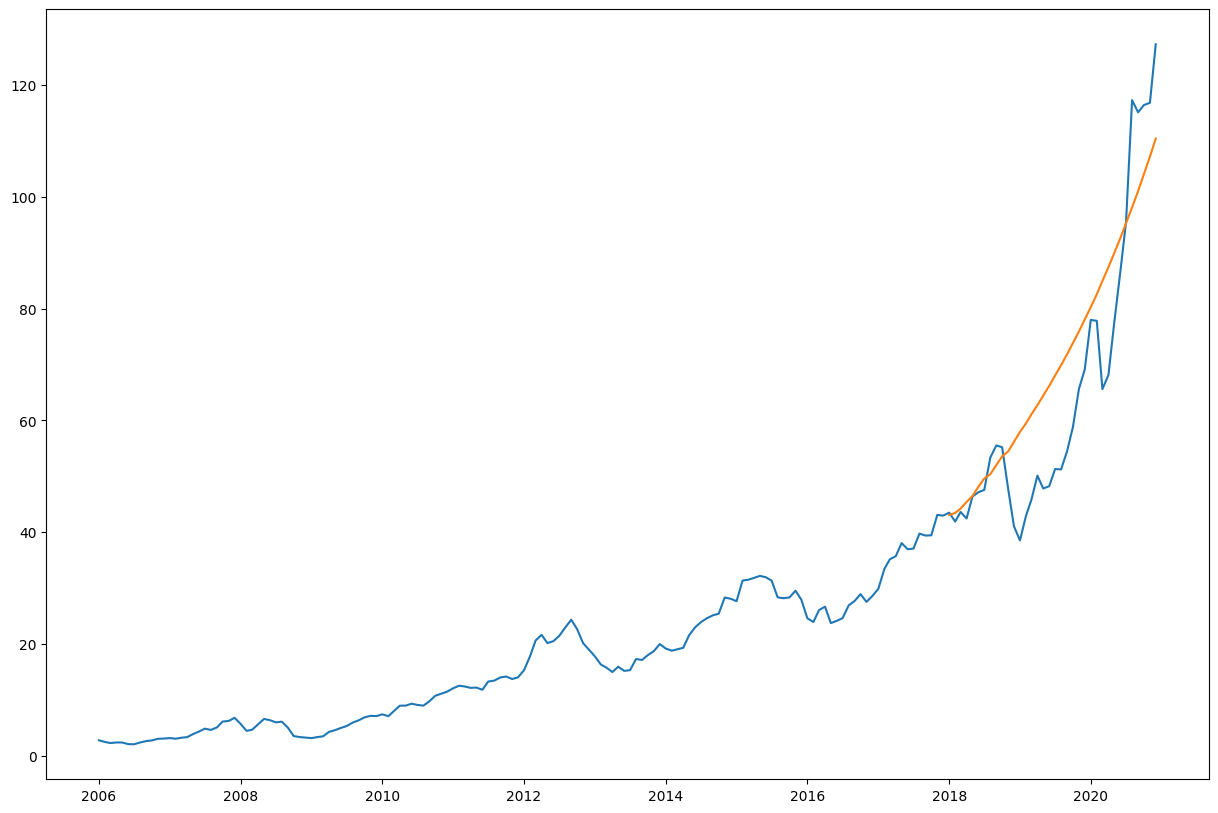

In [61]:
plt.figure(figsize=(15, 10))
plt.plot(df)
idx = pd.date_range(df.index[-36], periods=36, freq='MS')
plt.plot(pd.Series(inv_boxcox(fitted, -0.2), index=idx))

In [62]:
from sklearn.metrics import mean_absolute_percentage_error

print("MAPE:", mean_absolute_percentage_error(df.Close.values[-36:], inv_boxcox(fitted, -0.2)))

MAPE: 0.16957636469561874
